In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [2]:
df=pd.read_csv(r'C:\Users\User\Desktop\Sentiment Analysis\archive (5)\IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.shape

(50000, 2)

In [7]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

The Data Set Is Highly Balanced


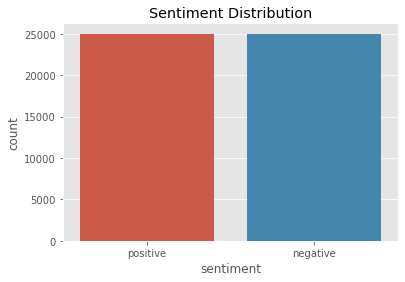

In [8]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
print("The Data Set Is Highly Balanced")

In [9]:
# Printing first 5 reviews along with the sentiments
for i in range (5):
    print("Review: ",[i])
    print(df['review'].iloc[i], "\n")
    print(df['sentiment'].iloc[i], "\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
#Replacing Categorial Values of Sentiment Column into Numerical Values

df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [12]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## Preprocessing Of Data

Lower Case Conversion

Removing Break Tags

Removing the URL's

Removing the hashtags and add symbols

Removing the punctuations

Removing the stopwords

In [13]:
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))


In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
def data_preprocessing(text):
    text=text.lower()
    text=re.sub('<br />','',text)
    text=re.sub(r"https\S+|http\S+",'',text,flags = re.MULTILINE)
    text=re.sub(r'\@w+|\#','',text)
    text=re.sub(r'[^\w\s]','',text)
    text_tokens=word_tokenize(text)
    filtered_text=[w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [16]:
df.review=df['review'].apply(data_preprocessing)

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


Checking and Removing the Duplicate entries


In [19]:
duplicates=df.duplicated().sum()
print(duplicates)

422


In [20]:
df=df.drop_duplicates('review')

In [21]:
#Stemming the text
def stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text


In [22]:
df['review']=df['review'].apply(stemmer)

In [23]:
postive_reviews=df[df.sentiment == 1]

In [31]:
postive_reviews.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
4,petter mattei love time money visual stun film...,1
5,probabl alltim favorit movi stori selfless sac...,1


In [28]:
postive_reviews.value_counts()

review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [29]:
from collections import Counter

In [32]:
count=Counter()
for text in postive_reviews['review'].values:
    for word in text.split():
        count[word] +=1
        

In [42]:
count.most_common(15)

[('film', 48842),
 ('movi', 42888),
 ('one', 26837),
 ('like', 19811),
 ('time', 15400),
 ('see', 14626),
 ('good', 14502),
 ('stori', 13606),
 ('charact', 13566),
 ('make', 13114),
 ('great', 12719),
 ('get', 12527),
 ('watch', 12425),
 ('love', 12014),
 ('well', 11258)]

In [43]:
pos_words= pd.DataFrame(count.most_common(15))
pos_words.columns = ['word','count']
pos_words.head()

,word,count
0,film,48842
1,movi,42888
2,one,26837
3,like,19811
4,time,15400


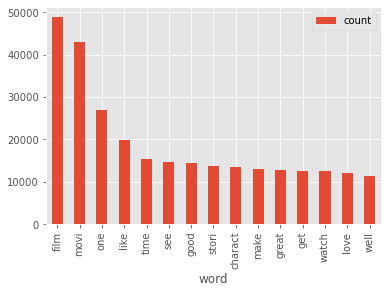

In [44]:
pos_words.plot(kind='bar',x='word',y='count')
plt.show()

In [45]:
negative_reviews=df[df.sentiment == 0]

In [46]:
negative_reviews.head()

,review,sentiment
3,basic there famili littl boy jake think there ...,0
7,show amaz fresh innov idea 70 first air first ...,0
8,encourag posit comment film look forward watch...,0
10,phil alien one quirki film humour base around ...,0
11,saw movi 12 came recal scariest scene big bird...,0


In [47]:
negative_reviews.value_counts()

review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [50]:
count=Counter()
for text in negative_reviews['review'].values:
    for word in text.split():
        count[word] +=1


In [51]:
count.most_common(15)

[('movi', 55289),
 ('film', 42590),
 ('one', 25414),
 ('like', 23647),
 ('make', 15262),
 ('get', 14969),
 ('even', 14933),
 ('watch', 14382),
 ('good', 14190),
 ('time', 14149),
 ('bad', 13963),
 ('charact', 13773),
 ('would', 13482),
 ('see', 12707),
 ('realli', 12085)]

In [52]:
neg_words= pd.DataFrame(count.most_common(15))
neg_words.columns = ['word','count']
neg_words.head()

,word,count
0,movi,55289
1,film,42590
2,one,25414
3,like,23647
4,make,15262


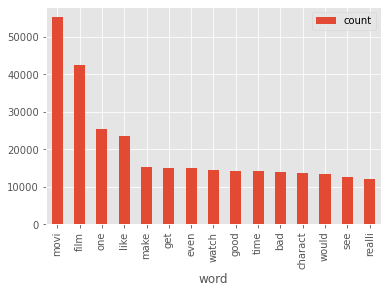

In [53]:
neg_words.plot(kind='bar',x='word',y='count')
plt.show()

In [55]:
X = df['review']
Y = df['sentiment']

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [57]:
from sklearn.model_selection import train_test_split

# Tfidf

In [60]:
vect= TfidfVectorizer()
X=vect.fit_transform(df['review'])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state = 43)
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 181967)
Size of y_train:  (34704,)
Size of x_test:  (14874, 181967)
Size of y_test:  (14874,)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
model1_predict=model1.predict(x_test)
model1_acc= accuracy_score(model1_predict, y_test)
print(model1_acc*100)

88.92026354712922


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
print(confusion_matrix(y_test, model1_predict))
print("\n")
print(classification_report(y_test, model1_predict))

[[6526  892]
 [ 756 6700]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7418
           1       0.88      0.90      0.89      7456

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



# Bag Of Words

In [69]:
vect2=CountVectorizer
X=vect.fit_transform(df['review'])

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 43)
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 181967)
Size of y_train:  (34704,)
Size of x_test:  (14874, 181967)
Size of y_test:  (14874,)


In [71]:
model1bow=LogisticRegression()
model1bow.fit(x_train,y_train)
model1bow_predict=model1bow.predict(x_test)
model1bow_acc= accuracy_score(model1bow_predict, y_test)
print(model1bow_acc*100)

88.92026354712922


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Word2Vec

In [77]:
import gensim

x = gensim.models.Word2Vec(df['review'], min_count=1)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 43)
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 181967)
Size of y_train:  (34704,)
Size of x_test:  (14874, 181967)
Size of y_test:  (14874,)


In [79]:
model1w2v=LogisticRegression()
model1w2v.fit(x_train,y_train)
model1w2v_predict=model1w2v.predict(x_test)
model1w2v_acc= accuracy_score(model1w2v_predict, y_test)
print(model1w2v_acc*100)

88.92026354712922


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Classifier

In [80]:
model2w2v=RandomForestClassifier()

model2w2v.fit(x_train,y_train)
model2w2v_predict=model2w2v.predict(x_test)
model2w2v_acc= accuracy_score(model2w2v_predict, y_test)
print(model2w2v_acc*100)

84.5434987226032


In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 5, 8],
 'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]}
grid = GridSearchCV(model2w2v, param_grid, refit=True, verbose=3 )
grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=2, n_estimators=10;, score=0.603 total time=   0.5s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=2, n_estimators=10;, score=0.581 total time=   0.4s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=2, n_estimators=10;, score=0.596 total time=   0.4s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=2, n_estimators=10;, score=0.581 total time=   0.4s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=2, n_estimators=10;, score=0.677 total time=   0.4s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=2, n_estimators=50;, score=0.689 total time=   1.7s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=2, n_estimators=50;, score=0.671 total time=   1.7s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=2, n_estimators=50;, score=0.699 total time=   1.7s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=2, n_estimators=50;, score=

[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=10;, score=0.676 total time=   1.3s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=10;, score=0.675 total time=   1.2s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=10;, score=0.714 total time=   1.2s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=10;, score=0.694 total time=   1.2s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=10;, score=0.682 total time=   1.2s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=50;, score=0.775 total time=   5.8s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=50;, score=0.778 total time=   5.8s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=50;, score=0.781 total time=   5.8s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=8, n_estimators=50;, score=0.787 total time=   5.8s
[CV 5/5] E

[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=10;, score=0.638 total time=   1.2s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=10;, score=0.651 total time=   1.2s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=10;, score=0.659 total time=   1.2s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=10;, score=0.656 total time=   1.2s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=10;, score=0.664 total time=   1.2s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=50;, score=0.758 total time=   5.4s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=50;, score=0.759 total time=   5.5s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=50;, score=0.759 total time=   5.4s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=5, n_estimators=50;, score=0.748 total time=   5.4s
[

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 8],
                         'n_estimators': [10, 50, 100]},
             verbose=3)

In [83]:
print("best CV score: {:2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best CV score: 0.813768
best parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 100}


# Naive Bayes

In [84]:
model3w2v=MultinomialNB()
model3w2v.fit(x_train,y_train)
model3w2v_predict=model3w2v.predict(x_test)
model3w2v_acc= accuracy_score(model3w2v_predict, y_test)
print(model3w2v_acc*100)

86.29151539599302


In [85]:
print(confusion_matrix(y_test, model3w2v_predict))
print("\n")
print(classification_report(y_test, model3w2v_predict))

[[6441  977]
 [1062 6394]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7418
           1       0.87      0.86      0.86      7456

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



# Support Vector Classifier

In [87]:
from sklearn.svm import LinearSVC

In [88]:
model4w2v=LinearSVC()
model4w2v.fit(x_train,y_train)
model4w2v_predict=model4w2v.predict(x_test)
model4w2v_acc= accuracy_score(model4w2v_predict, y_test)
print(model3w2v_acc*100)

86.29151539599302


In [89]:
vect= TfidfVectorizer()
X=vect.fit_transform(df['review'])
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 43)
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))


Size of x_train:  (34704, 181967)
Size of y_train:  (34704,)
Size of x_test:  (14874, 181967)
Size of y_test:  (14874,)


In [90]:
model4tfidf=LinearSVC()
model4tfidf.fit(x_train,y_train)
model4tfidf_predict=model4tfidf.predict(x_test)
model4tfidf_acc= accuracy_score(model4tfidf_predict, y_test)
print(model4tfidf_acc*100)

89.0278338039532


In [149]:
train_yhat = model4tfidf.predict(x_train)

In [150]:
train_acc = accuracy_score(y_train, train_yhat)

In [151]:
print(train_acc)

0.9595723835869064


In [154]:
test_yhat = model4tfidf.predict(x_test)
 

In [155]:
test_acc= accuracy_score(y_test, test_yhat)

In [156]:
print(test_acc)

0.891286809197257


# Hyperparameter Tunning with Grid Search CV

In [164]:
param_grid = { 'C':[1, 10, 100],
              
              'loss':['hinge', 'squared_hinge']} 
grid= GridSearchCV(model4tfidf, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...................C=1, loss=hinge;, score=0.891 total time=   0.7s
[CV 2/5] END ...................C=1, loss=hinge;, score=0.888 total time=   0.6s
[CV 3/5] END ...................C=1, loss=hinge;, score=0.879 total time=   0.5s
[CV 4/5] END ...................C=1, loss=hinge;, score=0.897 total time=   1.6s
[CV 5/5] END ...................C=1, loss=hinge;, score=0.891 total time=   0.5s
[CV 1/5] END ...........C=1, loss=squared_hinge;, score=0.889 total time=   0.5s
[CV 2/5] END ...........C=1, loss=squared_hinge;, score=0.884 total time=   0.5s
[CV 3/5] END ...........C=1, loss=squared_hinge;, score=0.881 total time=   0.5s
[CV 4/5] END ...........C=1, loss=squared_hinge;, score=0.896 total time=   0.5s
[CV 5/5] END ...........C=1, loss=squared_hinge;, score=0.886 total time=   0.5s
[CV 1/5] END ..................C=10, loss=hinge;, score=0.870 total time=   2.3s
[CV 2/5] END ..................C=10, loss=hinge;,

GridSearchCV(estimator=LinearSVC(C=1, loss='hinge'),
             param_grid={'C': [1, 10, 100], 'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [165]:
print("best CV score: {:2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best CV score: 0.889062
best parameters:  {'C': 1, 'loss': 'hinge'}


# Best Fit Model SVC having maximum Accuracy


In [166]:
model4tfidf=LinearSVC(C=1, loss='hinge')
model4tfidf.fit(x_train,y_train)
model4tfidf_predict=model4tfidf.predict(x_test)
model4tfidf_acc= accuracy_score(model4tfidf_predict, y_test)
print(model4tfidf_acc*100)




89.1286809197257


In [167]:
print(confusion_matrix(y_test, model4tfidf_predict))
print("\n")
print(classification_report(y_test, model4tfidf_predict))

[[6549  869]
 [ 748 6708]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7418
           1       0.89      0.90      0.89      7456

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



# Creating a .pkl file

In [124]:
import joblib

In [125]:
joblib.dump(model4tfidf,'Capstone_Model.pkl')

['Capstone_Model.pkl']

In [129]:
df.to_csv('df.csv', index=False)

In [128]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


In [131]:
pos_words.to_csv('pos_words.csv', index=False)

In [132]:
neg_words.to_csv('neg_words.csv', index=False)

In [138]:
counts.to_csv('df['sentiment'].value_counts()', index=False)

SyntaxError: invalid syntax (899892004.py, line 1)

In [139]:
m=df['sentiment'].value_counts()

In [140]:
m.head()

1    24883
0    24695
Name: sentiment, dtype: int64

In [141]:
m.to_csv('m.csv', index=False)

In [142]:
md=df['Number'] = range(1, len(df) + 1) 

In [147]:
df.head()

,review,sentiment,Number
0,one review mention watch 1 oz episod youll hoo...,1,1
1,wonder littl product film techniqu unassum old...,1,2
2,thought wonder way spend time hot summer weeke...,1,3
3,basic there famili littl boy jake think there ...,0,4
4,petter mattei love time money visual stun film...,1,5


In [148]:
df.to_csv('df.csv', index=False)